# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
medical.tail()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,3,0,1,10600.5483,0
1334,18,0,31.92,0,0,0,2205.9808,1
1335,18,0,36.85,0,0,2,1629.8335,1
1336,21,0,25.80,0,0,3,2007.9450,0
1337,61,0,29.07,0,1,1,29141.3603,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

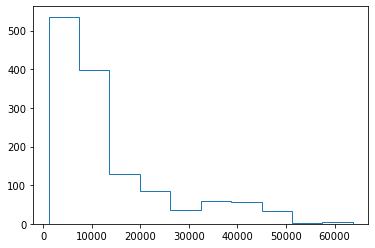

In [5]:
_ = plt.hist(medical['charges'],histtype='step')
plt.show()

In [6]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [7]:
medical.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
insuranceclaim,1338.0,0.585202,0.492871,0.0000,0.00000,1.000,1.000000,1.00000


## Charges on stats will vary wildly based on the type of procedures.  The mean is noticeably greater than the median due to high outliers.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
We're able to tell that the mean charges are over $13k, and we could re-sample a few times to find a normal distribution of the means.  

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [8]:
# Should we use a one-sided interval since we need to obtain a minimum valuable?  Not sure how to do this...
# So do they want me to resample here?  Should I use a t-score instead of a z-score?

# def townsfolk_sampler(n):
#     return np.random.choice(pop_heights, n)
# daily_sample365 = []
# for i in range(365):
#     daily_sample365.append(np.mean(townsfolk_sampler(10)))

In [9]:
# okay, so using t scores, this should be sample mean +/- (tscore)(sample std)/(50^.5)
sam_mean = np.mean(medical['charges'])
sam_std = np.std(medical['charges'],ddof=1)
print('Sample STD: ', sam_std)
standard_error = stats.sem(medical['charges'])
print('Sample standard error: ', standard_error)

# Finding T-score for getting bottom 5%... does this make sense?
t_1337 = stats.t.ppf(.05,1337)
print('T score for 1337 df at 95% confidence: ',t_1337)

# margin of error = t-score * standard error 
pct95_sam_margin_error = t_1337*standard_error
print('95% margin of error (using t-score, sample standard error): ', pct95_sam_margin_error)

# 95% Confidence Interval of the Mean
print('95% confidence interval of minimum value using sample margin of error: ', sam_mean+pct95_sam_margin_error)

Sample STD:  12110.011236693994
Sample standard error:  331.0674543156824
T score for 1337 df at 95% confidence:  -1.6459941145571324
95% margin of error (using t-score, sample standard error):  -544.9350813250255
95% confidence interval of minimum value using sample margin of error:  12725.48718381623


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
Null Hypothesis: Values of charges are independent of type of insurance
Alternative Hypothesis: Values of charges are correlated with type of insurance

If the alternative hypothesis is true, then most likely the variance of each group based on its insurance type will be smaller than the variance of the entire sample.  The only stat on insurance is whether or not they made an insurance claim.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [10]:
# Insurance group
x0 = medical['charges'][medical.insuranceclaim==1]
n0=len(x0)
std0=np.std(x0,ddof=1)
mean_x0=np.mean(x0)
x0.describe()

count      783.000000
mean     16423.928277
std      14045.928419
min       1131.506600
25%       5733.288925
50%      11538.421000
75%      23484.788875
max      63770.428010
Name: charges, dtype: float64

In [11]:
# No insurance group
x1 = medical['charges'][medical.insuranceclaim==0]
n1=len(x1)
std1=np.std(x1,ddof=1)
mean_x1=np.mean(x1)
x1.describe()

count      555.000000
mean      8821.421892
std       6446.510127
min       1121.873900
25%       4445.337575
50%       6933.242250
75%      11424.211575
max      36910.608030
Name: charges, dtype: float64

In [12]:
# Pooled std of the two groups
stdp=( ( (n0-1)*(std0**2)+(n1-1)*(std1**2) )/(n0+n1-2) )**.5
stdp

11520.034268775256

In [13]:
# T-test statistic using formula
t=(mean_x0-mean_x1)/( stdp*( (1/n0)+(1/n1) )**.5 )
t

11.89329903087671

In [14]:
# T-test statistic using scipy
t_again = stats.ttest_ind(x0,x1)
t_again

# Super tiny p-value!  Null hypothesis rejected!

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__
We could use scipy.stats.binom_test, right?
It takes x=sample size, n=population size, p=null hypothesis (usually .5, if we're trying to see if a sample is different from a population, right?).
We could use this on our current problem if we knew population data!

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test